<a href="https://colab.research.google.com/github/leesm0409/bootcamp/blob/main/12_K_Means_%EB%8F%84%EB%A7%A4%EC%97%85_%EA%B3%A0%EA%B0%9D_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 도매업(Wholesale customers) 데이터셋을 활용한 군집분석

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 준비하기

*   https://archive.ics.uci.edu/dataset/292/wholesale+customers
*   도매업의 고객의 각 품목에 대한 연간 지출



In [ ]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(uci_path)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## 데이터 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.Channel.unique()  # Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
df['Channel'].unique()

array([2, 1])

In [ ]:
df.Region.unique() # Lisnon, Oporto or Other (Nominal)

array([3, 1, 2])

## 데이터 전처리

In [ ]:
X = df.copy()
X.shape

(440, 8)

In [ ]:
from sklearn import preprocessing
# 데이터 정규화 -> 범위 축소 (군집간의 거리 계산을 위해)

X = preprocessing.StandardScaler().fit_transform(X)
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

## K=Means 군집 모델 설정

In [ ]:
from sklearn import cluster
import warnings
warnings.filterwarnings('ignore')

kmeans = cluster.KMeans(n_clusters=5, random_state=7)

## 모델 학습하기

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=7)

In [ ]:
# n_clusters=5 -> 0~4 군집 만들기
cluster_label = kmeans.labels_
cluster_label

array([3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1,
       1, 0, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 0, 3, 3, 1, 1, 3, 3, 1, 1, 0, 3, 1, 1, 3, 0, 3, 3, 1, 0,
       1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 0, 4, 4, 3, 4, 3, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 3, 4, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 4, 3, 3, 4, 3,

In [ ]:
df['Cluster'] = cluster_label
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,3
438,1,3,10290,1981,2232,1038,168,2125,1


## 클러스터링 결과 분석 (시각화)

### 지역과 채널과의 연관관계

In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Cluster'],
      dtype='object')

<Axes: xlabel='Channel', ylabel='Region'>

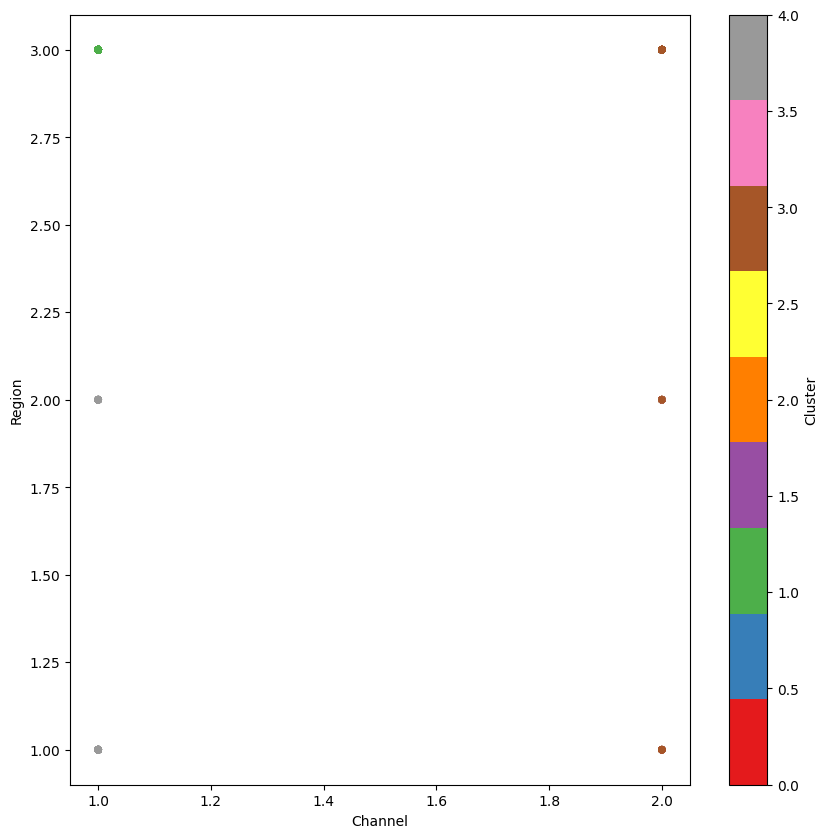

In [ ]:
# Channel(1,2)
# Region(1,2,3)
# 1 클러스터 -> 1채널의 3번 지역 Horeca (Hotel/Restaurant/CafÃ©)의 3번 지역()
df.plot(kind='scatter', x='Channel', y='Region', c='Cluster', cmap='Set1', figsize=(10,10))

## 품목들간의 연관 관계 ('Fresh', 'Milk')

<Axes: xlabel='Milk', ylabel='Fresh'>

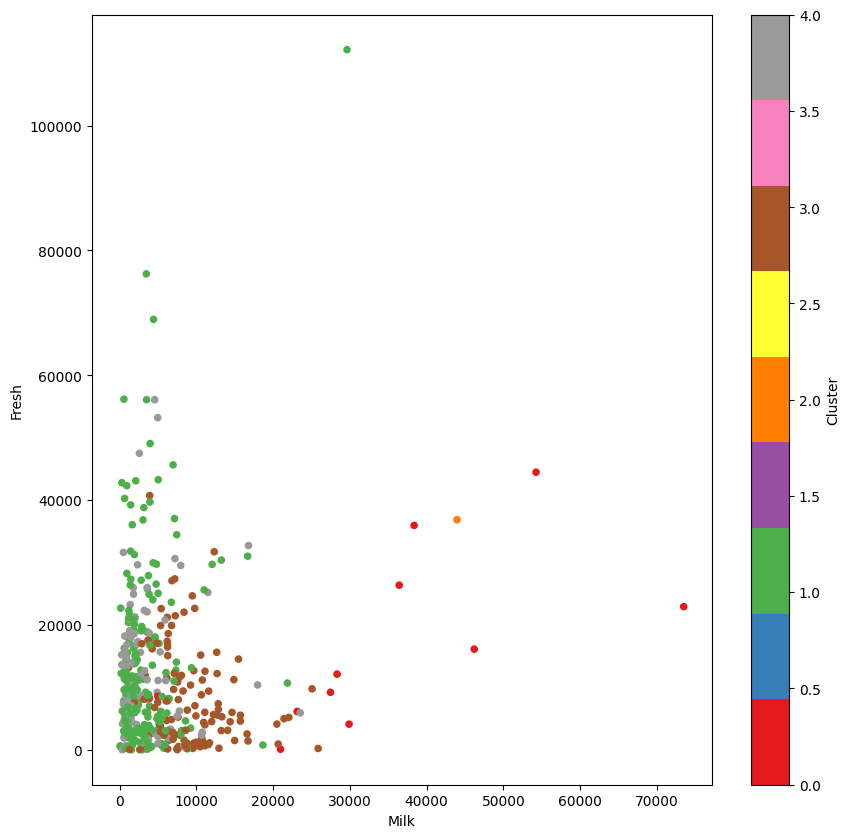

In [ ]:
df.plot(kind='scatter', x='Milk', y='Fresh', c='Cluster', cmap='Set1', figsize=(10,10))

## 품목들간의 연관 관계 ('Frozen', 'Detergents_Paper')

<Axes: xlabel='Frozen', ylabel='Detergents_Paper'>

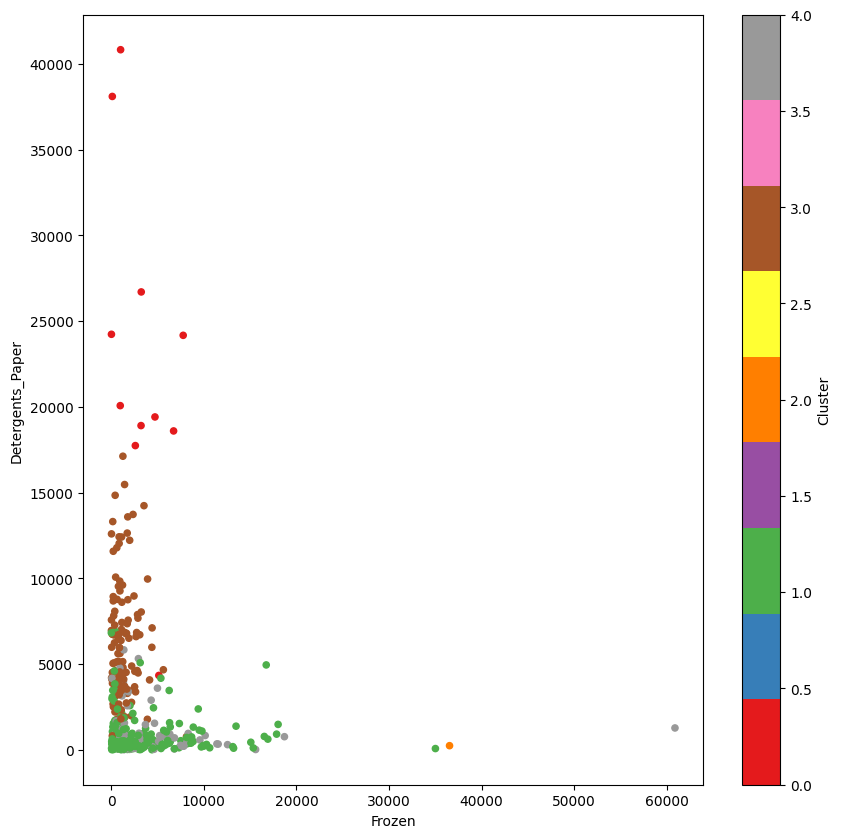

In [ ]:
df.plot(kind='scatter', x='Frozen', y='Detergents_Paper', c='Cluster', cmap='Set1', figsize=(10,10))

<Axes: xlabel='Frozen', ylabel='Detergents_Paper'>

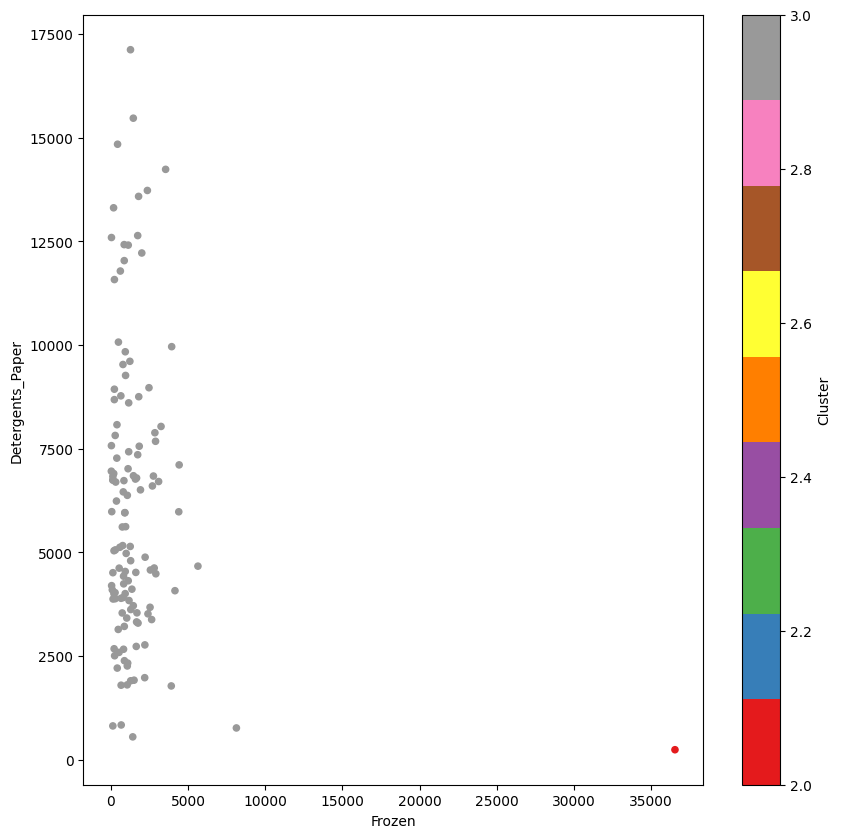

In [ ]:
# 특정 클러스터 확인 (2,3번 클러스터 자세히)
mask = (df['Cluster'] == 2) | (df['Cluster'] == 3)
ndf = df[mask]
ndf.plot(kind='scatter', x='Frozen', y='Detergents_Paper', c='Cluster', cmap='Set1', figsize=(10,10))

<Axes: xlabel='Frozen', ylabel='Detergents_Paper'>

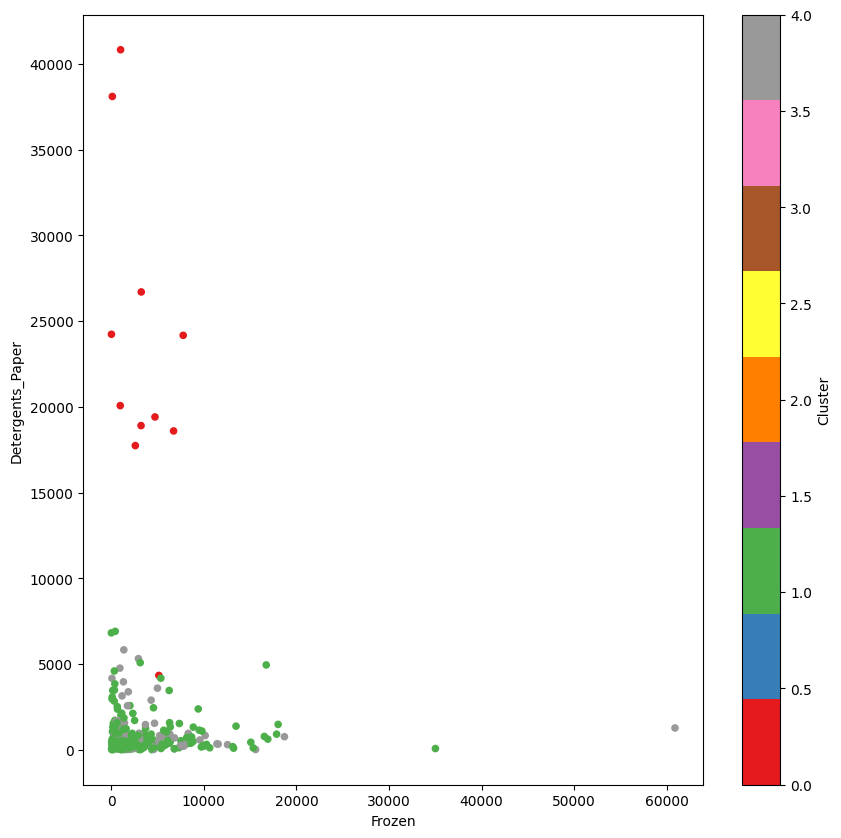

In [ ]:
# 특정 클러스터 확인 (2,3번 클러스터 말고 나머지 자세히)
mask = (df['Cluster'] == 2) | (df['Cluster'] == 3)
ndf = df[~mask]
ndf.plot(kind='scatter', x='Frozen', y='Detergents_Paper', c='Cluster', cmap='Set1', figsize=(10,10))

### 클러스터 비율 확인

<Axes: ylabel='Cluster'>

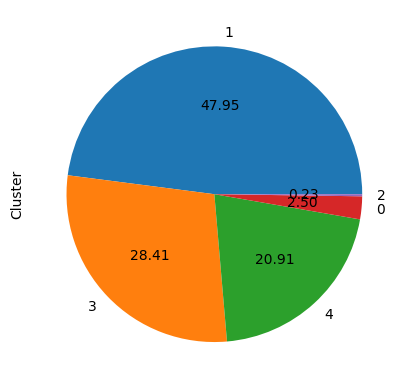

In [ ]:
df.Cluster.value_counts().plot.pie(autopct='%.2f')

## K - Means 클러스터 3으로 지정하여 모델 수정

In [ ]:
kmeans_3 = cluster.KMeans(n_clusters=3, random_state=7)
kmeans_3.fit(X)


KMeans(n_clusters=3, random_state=7)

In [ ]:
ndf = df.copy()
ndf['Cluster'] = kmeans_3.labels_

<Axes: ylabel='Cluster'>

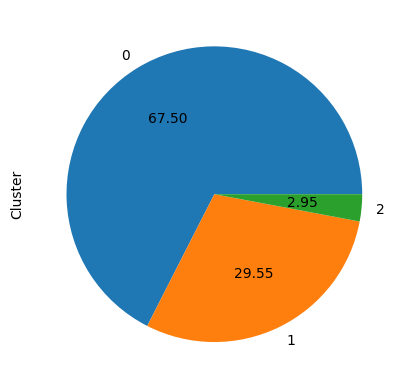

In [ ]:
ndf.Cluster.value_counts().plot.pie(autopct='%.2f')

ValueError: ignored

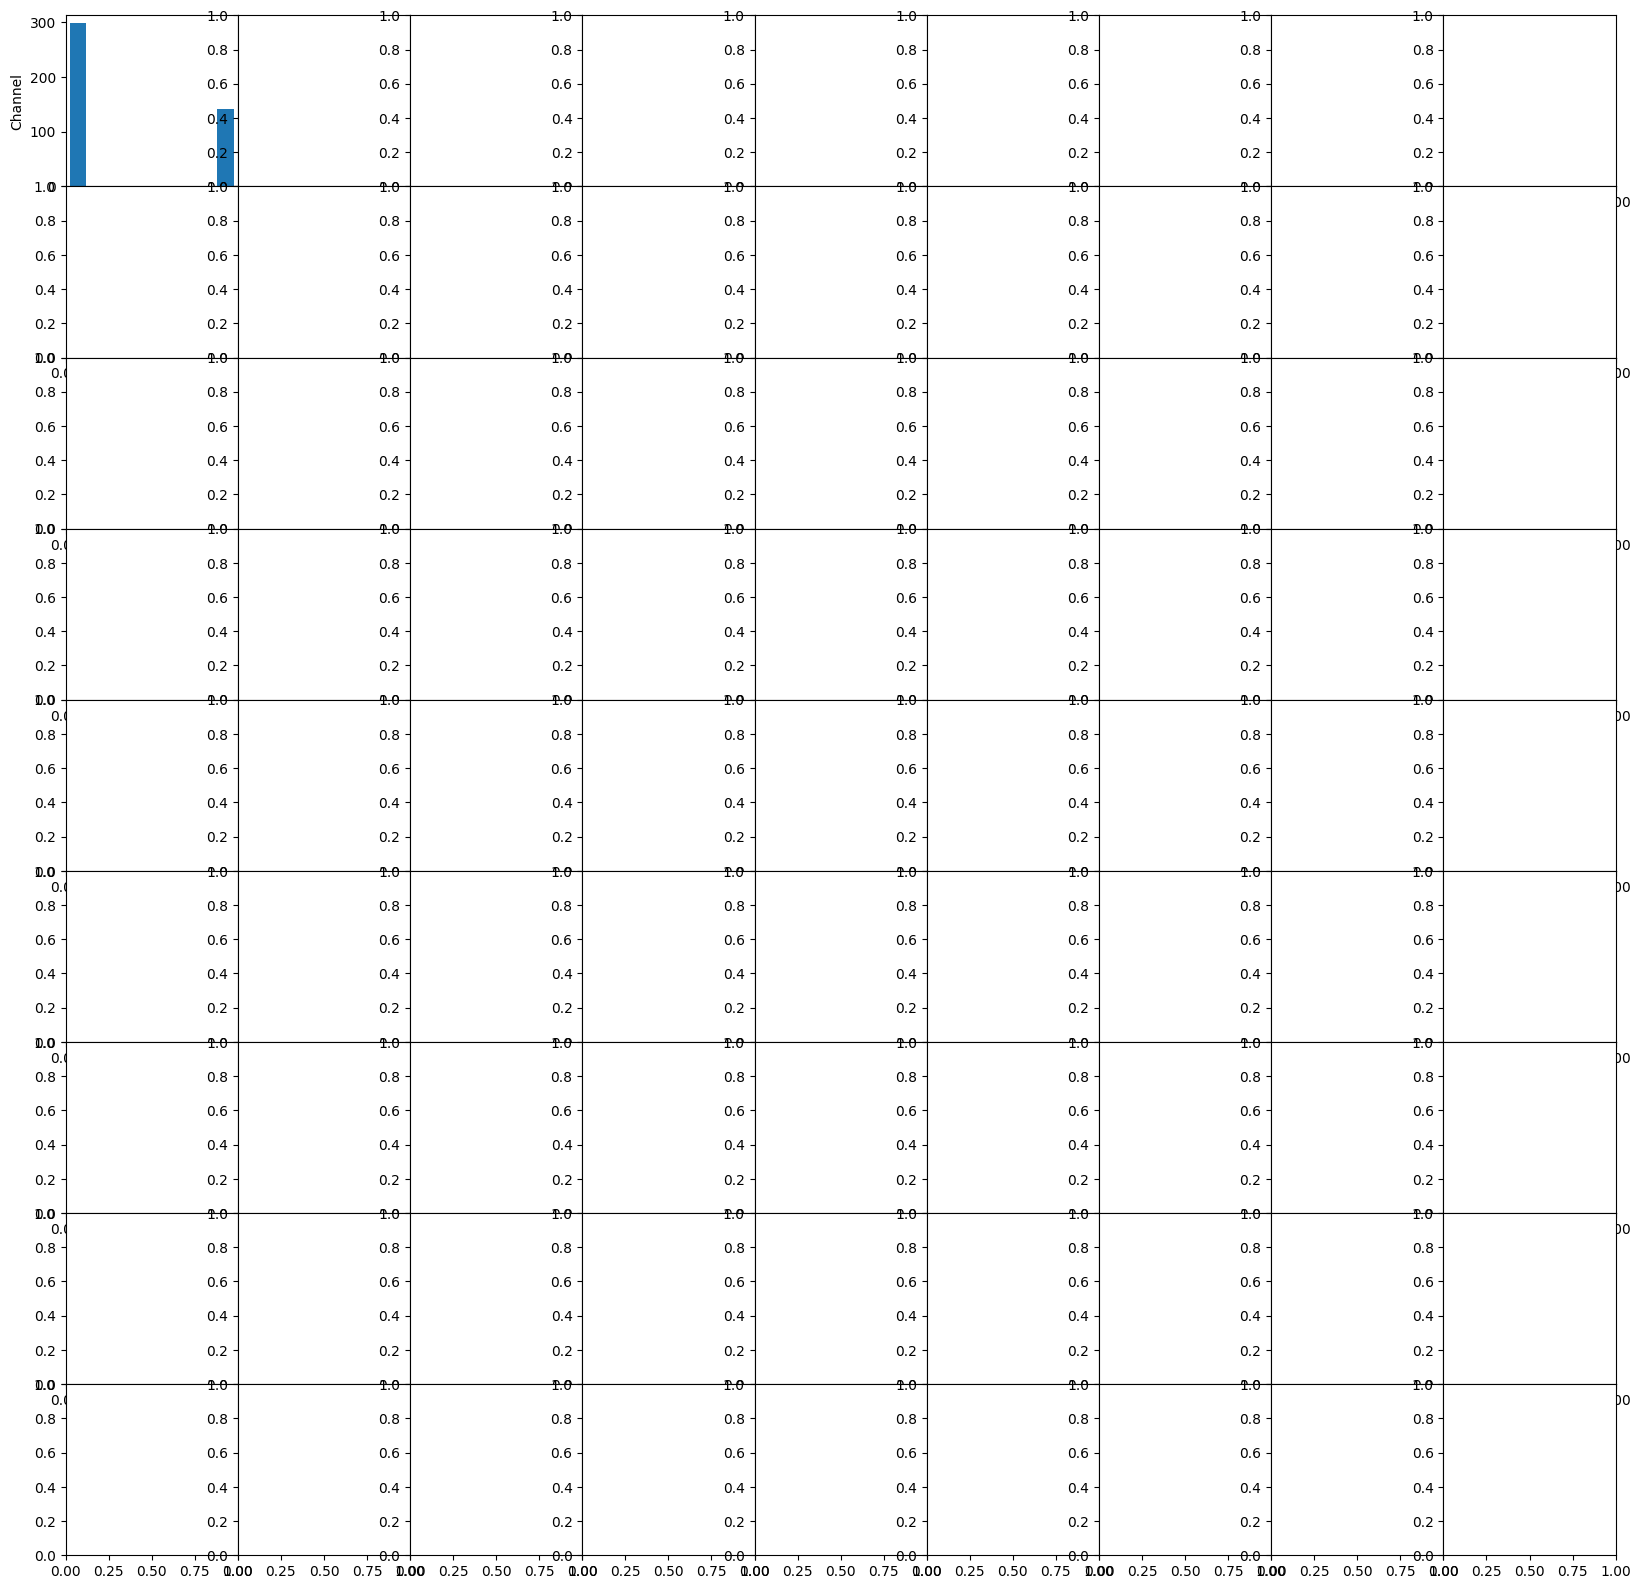

In [ ]:
pd.plotting.scatter_matrix(ndf, c = ['Cluster'],figsize=(20,20),marker='o',
                           alpha = 0.8)
plt.tight_layout()

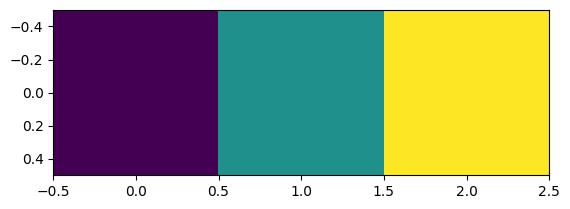

In [ ]:
import numpy as np

plt.imshow([np.unique(ndf['Cluster'])])
plt.show()